In [1]:
print('importing')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def df_to_input_output(df, with_ts=False):
    output_cols = ['load_to_pred']
    ts_cols = ['ts_pred']
    input_cols = [col for col in df.columns
                  if col not in output_cols + ts_cols]
    
    X = np.array(df[input_cols], dtype=float).reshape(-1, len(input_cols))  # (n_samples, n_features)
    y = np.array(df[output_cols], dtype=float).reshape(-1, len(output_cols))  # (n_samples, n_targets)
    ts = np.array(df[ts_cols]).reshape(-1, len(ts_cols))
    
    return (X, y, ts) if with_ts else (X, y)

print('loading')
df = pd.read_pickle('./data/data.pkl')
print('done')

importing
loading
done


In [2]:
df_ts_strs = df.ts_pred.map(str)

In [54]:
start_ts_str = '2020-06-01 00:00:00+02:00'
end_ts_str = '2020-06-08 00:00:00+02:00'
start_entry = df[df_ts_strs == start_ts_str]
end_entry = df[df_ts_strs == end_ts_str]
start_idx, end_idx = start_entry.index[0], end_entry.index[0]
data_section = df[start_entry.index[0]:end_entry.index[0]]
data_section

,ts_pred,load_to_pred,cat_is_sunday_or_holiday,cat_is_saturday_and_not_holiday,cat_is_workday,cat_is_heating_period,load_last_year,load_last_week,load_yesterday,load_last_hour,spline_peaking_at_21,spline_peaking_at_0,spline_peaking_at_3,spline_peaking_at_6,spline_peaking_at_9,spline_peaking_at_12,spline_peaking_at_15,spline_peaking_at_18
154844,2020-06-01 00:00:00+02:00,9530.00,True,False,False,False,10877.50,10356.75,9694.25,10294.25,0.166667,0.666667,0.166667,0.000000,0.0,0.0,0.0,0.000000
154845,2020-06-01 00:15:00+02:00,9355.75,True,False,False,False,10657.00,10268.25,9547.50,10032.75,0.128376,0.660012,0.211516,0.000096,0.0,0.0,0.0,0.000000
154846,2020-06-01 00:30:00+02:00,9187.50,True,False,False,False,10438.00,10110.25,9442.50,9830.50,0.096451,0.641204,0.261574,0.000772,0.0,0.0,0.0,0.000000
154847,2020-06-01 00:45:00+02:00,9055.50,True,False,False,False,10400.00,9995.25,9347.50,9691.50,0.070312,0.611979,0.315104,0.002604,0.0,0.0,0.0,0.000000
154848,2020-06-01 01:00:00+02:00,8917.50,True,False,False,False,10216.75,9907.25,9197.50,9530.00,0.049383,0.574074,0.370370,0.006173,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155511,2020-06-07 22:45:00+02:00,11035.00,True,False,False,False,12447.50,10456.25,11139.25,11273.75,0.425637,0.529225,0.033083,0.000000,0.0,0.0,0.0,0.012056
155512,2020-06-07 23:00:00+02:00,10777.25,True,False,False,False,12155.00,10294.25,10836.25,11395.50,0.370370,0.574074,0.049383,0.000000,0.0,0.0,0.0,0.006173
155513,2020-06-07 23:15:00+02:00,10567.75,True,False,False,False,11903.00,10032.75,10699.25,11318.50,0.315104,0.611979,0.070312,0.000000,0.0,0.0,0.0,0.002604
155514,2020-06-07 23:30:00+02:00,10350.75,True,False,False,False,11845.00,9830.50,10545.25,11169.75,0.261574,0.641204,0.096451,0.000000,0.0,0.0,0.0,0.000772


saving
showing


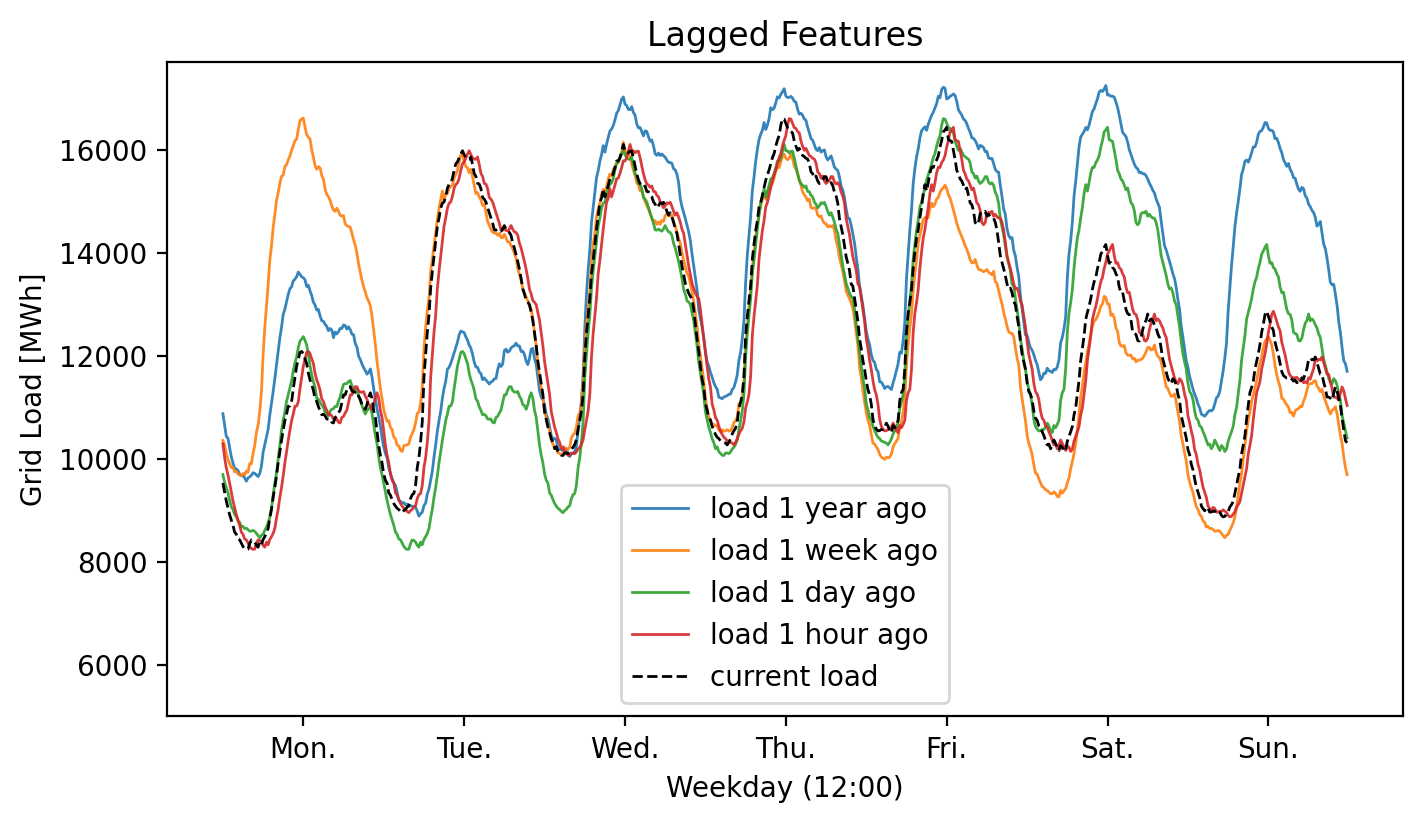

In [77]:
SAVE_FIG = True
DPI = 200 if SAVE_FIG else 100
SAVE_PATH = 'comparison_storage/plots/lagged_features_example.pdf'

xshift = 10
load_cols = {
    'load_last_year': 'load 1 year ago',
    'load_last_week': 'load 1 week ago',
    'load_yesterday': 'load 1 day ago',
    'load_last_hour': 'load 1 hour ago',
    'load_to_pred': 'current load',
}
# colors = {
#     'load_to_pred': 'black',
#     'load_last_hour': 'black',
#     'load_yesterday': 'black',
#     'load_last_week': 'black',
#     'load_last_year': 'black',
# }

fig, ax = plt.subplots(figsize=(7,4), dpi=DPI, layout='constrained')

for col, label in load_cols.items():
    if col == 'load_to_pred':
        color='black'
        linestyle='--'
        alpha = 1
        zorder = 3
    else:
        color = None
        linestyle='-'
        alpha = 0.9
        zorder = 1
    ax.plot(data_section[col], label=label, color=color, linestyle=linestyle, alpha=alpha, zorder=zorder, linewidth=1)

ax.set_ylim(bottom=5000)
# ax.set_xlim(start_idx-xshift, end_idx+xshift)

weekdays = data_section.ts_pred.map(lambda ts: ts.day_name()[:3] + '.')
is_noon = data_section.ts_pred.map(lambda ts: (ts.hour, ts.minute, ts.second) == (12,0,0) )
weekdays_on_noon = weekdays[is_noon]
ax.set_xticks(weekdays_on_noon.index, weekdays_on_noon.values)

ax.legend(loc='lower center')
ax.set_xlabel('Weekday (12:00)')
ax.set_ylabel('Grid Load [MWh]')
plt.title('Lagged Features')

if SAVE_FIG:
    print('saving')
    plt.savefig(SAVE_PATH)
print('showing')